# MASS Algorithm Tutorial

This notebook is a tutorial on how to use STUMPY and the MASS algorithm [1] to compute a **distance profile**, a vector containing all of the distances from a query subsequence to the subsequences of a time series.

In this tutorial we are going to reproduce one of the use case mentioned in this [presentation](https://www.cs.unm.edu/~mueen/Simple_Case_Studies_Using_MASS.pptx).

## Load Libraries and Data

In [35]:
%matplotlib inline
import numpy as np
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request 

In [36]:
def change_plot_size(width, height, plt):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams['xtick.direction'] = 'out'
    
change_plot_size(20, 6, plt)

The use case dataset is the "Sony AIBO robot dog dataset" and comes from an accelerometer inside a Sony AIBO robot dog ([dataset source](https://www.cs.ucr.edu/~eamonn/time_series_data_2018/)). The query comes from a period when the dog was walking on carpet, the time series data we will search comes from a time the robot walked on cement (for 5000 data points), then carpet (for 3000 data points), then back onto cement.

In [37]:
#load SampleTarget (time series)
st_url = 'https://www.cs.unm.edu/~mueen/robot_dog.txt'
st_txt = urllib.request.urlopen(st_url)
sample_target = pd.read_csv(st_txt, sep="\s+", header = None)[0]

#load Pattern (query subsequence)
pattern_url = 'https://www.cs.unm.edu/~mueen/carpet_query.txt'
pattern_txt = urllib.request.urlopen(pattern_url)
pattern = pd.read_csv(pattern_txt, sep="\s+", header = None)[0]

pattern.shape, sample_target.shape

((100,), (13000,))

## Plot Data

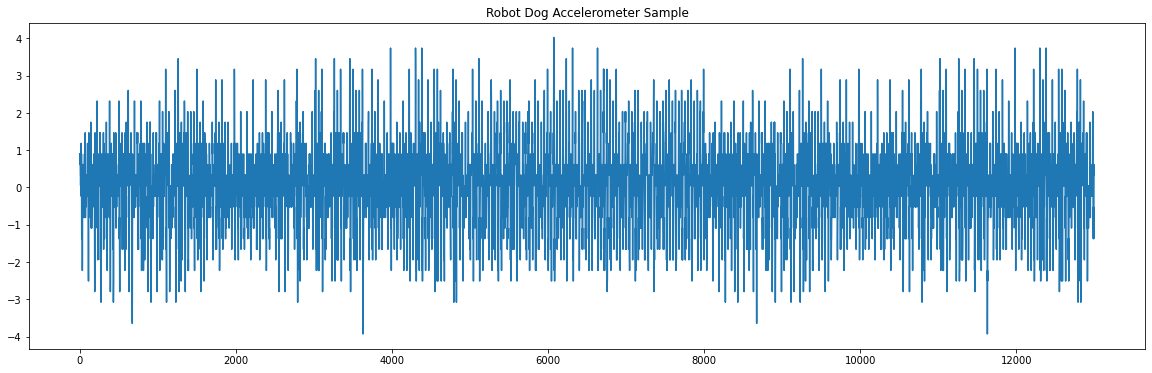

In [38]:
plt.plot(sample_target)
plt.title('Robot Dog Accelerometer Sample')
plt.show()

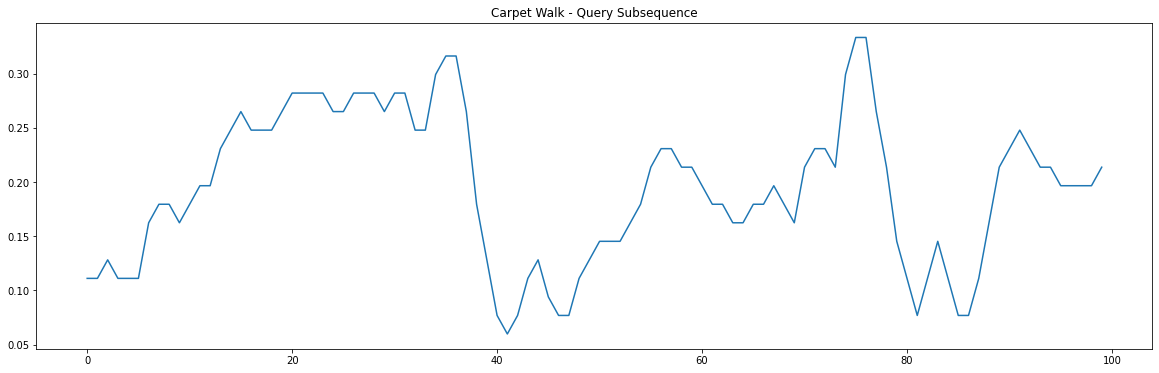

In [39]:
plt.plot(pattern)
plt.title('Carpet Walk - Query Subsequence')
plt.show()

## Distance Profile

What we want to do is to perform a similarity search for our query subsequence (dog walking on the carpet). Thus, we search for a known pattern (the dog walking on the Carpet) in the entire time series and returns the most similar subsequences. To do so in Python, we can simply use the STUMPY function `core.mass`

In [40]:
from stumpy.core import mass
distance_profile = mass(pattern, sample_target)

In [41]:
#find k indexes pointing to k most similar subsequences 
k = 16
min_idxs = np.argpartition(distance_profile, k)[:k]
min_idxs = min_idxs[np.argsort(distance_profile[min_idxs])]

In [42]:
#quick test
np.sort(distance_profile)[:k][0] == distance_profile[min_idxs][0]

True

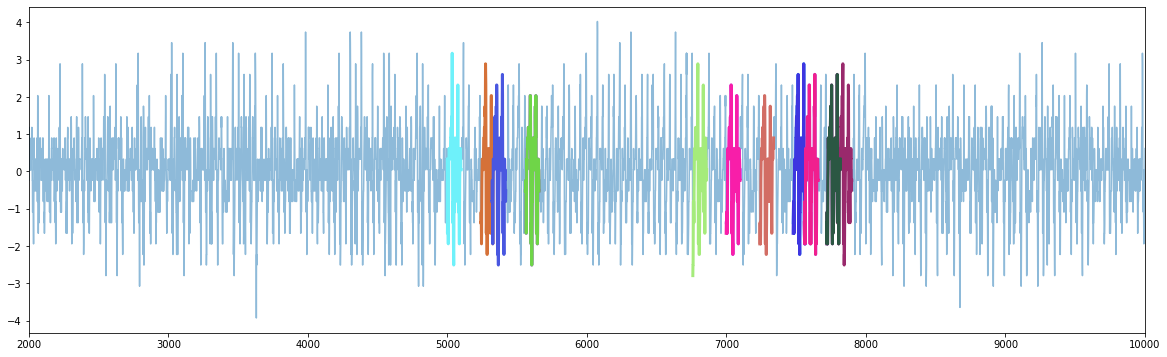

In [43]:
#plot top k patterns
m = len(pattern)
plt.plot(sample_target,  alpha=0.5)
plt.xlim((2000, 10000)) #limit x axis for better visualization
for i in range(k):
    plt.plot(
        list(range(min_idxs[i], (min_idxs[i] + m))),
        sample_target[min_idxs[i] : (min_idxs[i] + m)],
        c = np.random.rand(3,),
        linewidth=3.0,
    )

Note that the best matches all occur during the carpet walking period (5000 - 8000 range). The best match is plotted below together with the query subsequence to show their similarity.

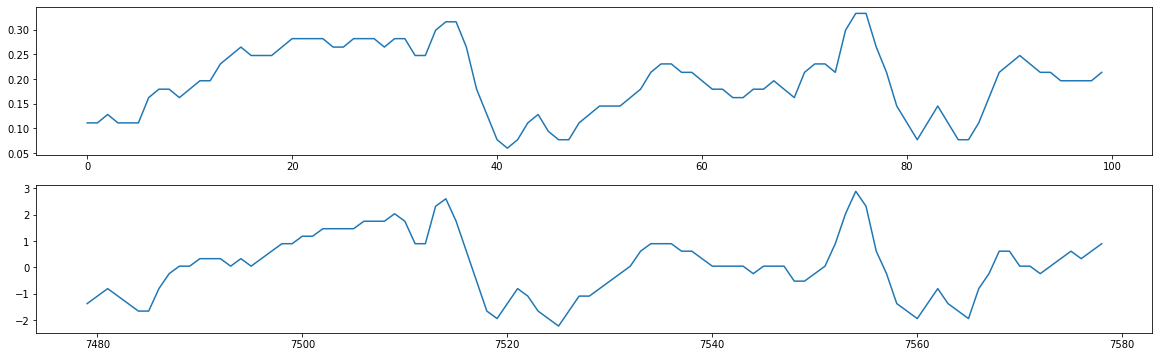

In [44]:
#Plot Best Match
fig, axs = plt.subplots(2)

# pattern
axs[0].plot(pattern)
# best match
axs[1].plot(sample_target[min_idxs[0] : (min_idxs[0] + m)])
plt.show()

## References

[1] Abdullah Mueen, Yan Zhu, Michael Yeh, Kaveh Kamgar, Krishnamurthy Viswanathan, Chetan Kumar Gupta and Eamonn Keogh (2015), The Fastest Similarity Search Algorithm for Time Series Subsequences under Euclidean Distance, URL: http://www.cs.unm.edu/~mueen/FastestSimilaritySearch.html